In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


Estimate of crack : 20.72%


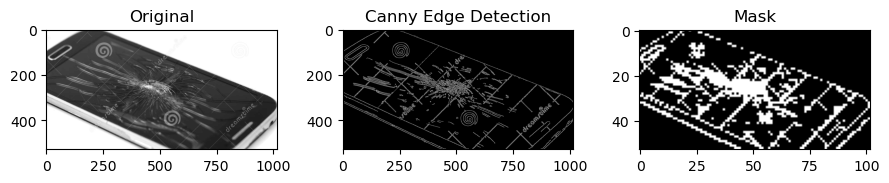

In [5]:
url = "/Users/sumeshks/Desktop/CV project/cv proj/output/cropped_00000061.png"
img1 = cv.imread(url)

def preprocess(url):
    img = cv.imread(url,0)
    img_edge = cv.Canny(img,100,200)
    return img, img_edge

def edge_prob(window, cut_off):
    pixels  = np.array(window.ravel())
    if ((np.count_nonzero(pixels)/len(pixels))>cut_off):
        return 1
    else:
        return 0
    
def sliding_mat(img,window_x=10,window_y=10, cut_off=0.1):
    
    arr_x = np.arange(0,img.shape[0],window_x)
    arr_y = np.arange(0,img.shape[1],window_y)

    A = np.zeros((len(arr_x),len(arr_y)))

    for i,x in enumerate(arr_x):
        for j,y in enumerate(arr_y):
            window = img[x:x+window_x,y:y+window_y]
            A[i,j] = edge_prob(window, cut_off=cut_off)
    
    return A, arr_x, arr_y

def plot_all(img,canny_edge,A):
    fig = plt.figure(figsize = (9,4))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, cmap="gray")
    ax1.set_title("Original")
    
    ax2 = fig.add_subplot(132)
    ax2.set_title("Canny Edge Detection")
    ax2.imshow(canny_edge, cmap="gray")
    
    ax3 = fig.add_subplot(133)
    ax3.set_title("Mask")
    ax3.imshow(A,cmap="gray")
    plt.tight_layout()
    plt.show()

img1,c1 = preprocess(url)
A, arr_x, arr_y = sliding_mat(c1, window_x=10, window_y=10, cut_off=0.1)
print("Estimate of crack : {:.2f}%".format(np.sum(A)/A.size*100))
plot_all(img1,c1,A)

Shape of image (532, 270)
Shape of : A (54, 27)


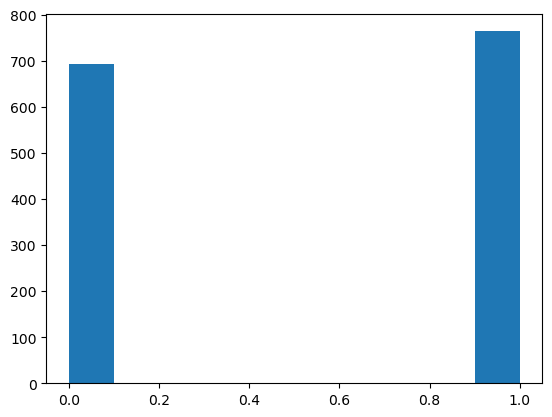

In [5]:
print("Shape of image {}\nShape of : A {}".format(c1.shape,A.shape))
plt.hist(A.ravel())
plt.show()